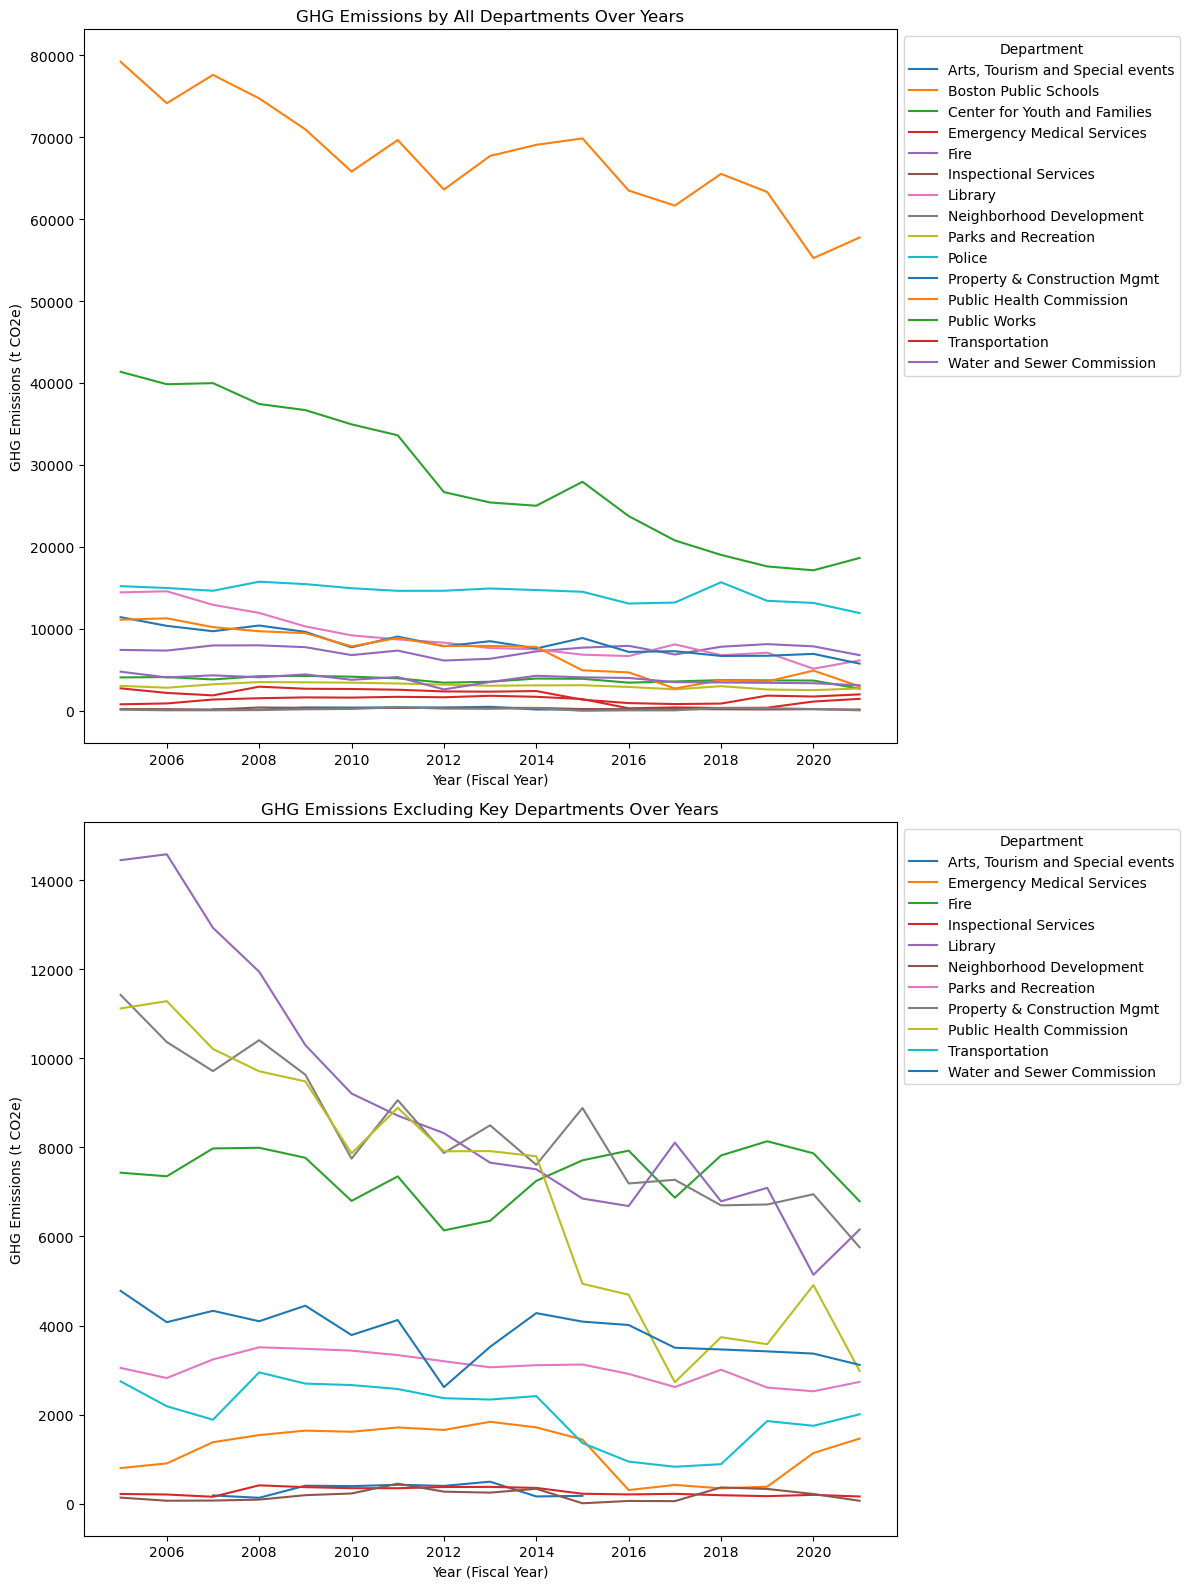

In [11]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the data
greenhouse_gas_df = pd.read_csv("data/rawData.csv")

# Filter out rows where 'GHG Emissions (t CO2e)' column has a hyphen "-"
# Convert 'GHG Emissions (t CO2e)' column to float after removing commas
greenhouse_gas_df = greenhouse_gas_df[greenhouse_gas_df['GHG Emissions (t CO2e)'] != "-"]
greenhouse_gas_df['GHG Emissions (t CO2e)'] = greenhouse_gas_df['GHG Emissions (t CO2e)'].str.replace(',', '').astype(float)

# Group the data by 'Department Longname' and 'Year (Fiscal Year)' and sum GHG Emissions
ghg_per_dept_year = greenhouse_gas_df.groupby(['Department Longname', 'Year (Fiscal Year)'])['GHG Emissions (t CO2e)'].sum().reset_index()

# Exclude specific departments
excluded_departments = ['Boston Public Schools', 'Center for Youth and Families', 'Police', 'Public Works']
ghg_per_dept_year_filtered = ghg_per_dept_year[~ghg_per_dept_year['Department Longname'].isin(excluded_departments)]

# Plotting both all departments and excluding specific ones
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

# Plot for all departments
departments = ghg_per_dept_year['Department Longname'].unique()
for department in departments:
    dept_data = ghg_per_dept_year[ghg_per_dept_year['Department Longname'] == department]
    ax1.plot(dept_data['Year (Fiscal Year)'], dept_data['GHG Emissions (t CO2e)'], label=department)

ax1.set_title('GHG Emissions by All Departments Over Years')
ax1.set_xlabel('Year (Fiscal Year)')
ax1.set_ylabel('GHG Emissions (t CO2e)')
ax1.legend(title='Department', loc='upper left', bbox_to_anchor=(1, 1))  # Position legend outside the plot

# Plot excluding specific departments
departments_filtered = ghg_per_dept_year_filtered['Department Longname'].unique()
for department in departments_filtered:
    dept_data = ghg_per_dept_year_filtered[ghg_per_dept_year_filtered['Department Longname'] == department]
    ax2.plot(dept_data['Year (Fiscal Year)'], dept_data['GHG Emissions (t CO2e)'], label=department)

ax2.set_title('GHG Emissions Excluding Key Departments Over Years')
ax2.set_xlabel('Year (Fiscal Year)')
ax2.set_ylabel('GHG Emissions (t CO2e)')
ax2.legend(title='Department', loc='upper left', bbox_to_anchor=(1, 1))  # Position legend outside the plot

plt.tight_layout()  # Adjust layout to prevent overlap
plt.show()